2. Exploratory Data Analysis (EDA)
Author: Faith

This notebook performs exploratory and statistical analysis on the cleaned Mental Health in Tech dataset.

Our objective is to:

Understand key patterns and relationships between demographic/workplace factors and mental health treatment-seeking behavior.

Focus specifically on respondents from the United States, where data on state and employment type is more complete.

Use the insights gained here to guide the development of a Streamlit-based predictive application, which will estimate the likelihood that a person may need to seek mental health treatment.

This analysis helps ensure that the features we use in our model are meaningful, relevant, and grounded in the observed data trends.

In [ ]:
#  Step 1: Import Libraries

# Import the pandas library and assign it the alias 'pd'.
# Pandas is used for data manipulation and analysis, especially working with DataFrames.
import pandas as pd

# Import the pyplot module from the matplotlib library and assign it the alias 'plt'.
# This module is used for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Import the seaborn library and assign it the alias 'sns'.
# Seaborn is a statistical data visualization library built on top of matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Set the aesthetic style of the plots to "whitegrid".
# This makes plots easier to read by adding a white background and grid lines.
sns.set(style='whitegrid')


In [2]:
# 📂 Step 2: Load the Cleaned Dataset

# Load the cleaned CSV file into a pandas DataFrame.
# The path '../data/final/survey_cleaned.csv' is relative, meaning it goes up one folder,
# then into the 'data/final' folder to find the file named 'survey_cleaned.csv'.
# The resulting DataFrame is stored in the variable 'df'.
df = pd.read_csv('../data/final/survey_cleaned.csv')

# Display the first 5 rows of the DataFrame to get a quick look at the dataset structure and contents.
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,Il,No,No,Yes,Often,6-25,...,Yes,Somewhat Easy,No,No,Some Of Them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,In,No,No,No,Rarely,More Than 1000,...,Don'T Know,Don'T Know,Maybe,No,No,No,No,No,Don'T Know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,Not Applicable,No,No,No,Rarely,6-25,...,Don'T Know,Somewhat Difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Not Applicable,No,Yes,Yes,Often,26-100,...,No,Somewhat Difficult,Yes,Yes,Some Of Them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,Tx,No,No,No,Never,100-500,...,Don'T Know,Don'T Know,No,No,Some Of Them,Yes,Yes,Yes,Don'T Know,No


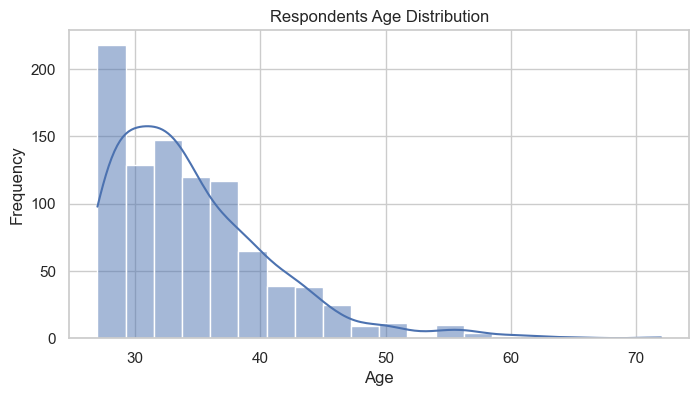

In [ ]:
#  Distribution of Age

# Create a new figure for the plot with a specified width and height in inches.
plt.figure(figsize=(8, 4))

# Create a histogram of the 'Age' column in the dataset using Seaborn.
# - 'kde=True' adds a Kernel Density Estimate line to show the distribution's shape.
# - 'bins=20' specifies that the age data should be grouped into 20 intervals (bins).
sns.histplot(df['Age'], kde=True, bins=20)

# Set the title of the plot.
plt.title('Respondents Age Distribution')

# Label the x-axis as 'Age'.
plt.xlabel('Age')

# Label the y-axis as 'Frequency', representing the count of respondents in each age bin.
plt.ylabel('Frequency')

# Display the plot.
plt.show()


In [ ]:
#  Standardize gender values

# Define a function to clean and standardize gender values.
def clean_gender(gender):
    # Convert the input to a string, strip leading/trailing whitespace, and convert to lowercase.
    gender = str(gender).strip().lower()
    
    # Check if the gender value matches known variants of 'Male'.
    if gender in ['male', 'm', 'man', 'cis male', 'cis man']:
        return 'Male'
    
    # Check if the gender value matches known variants of 'Female'.
    elif gender in ['female', 'f', 'woman', 'cis female', 'cis-woman']:
        return 'Female'
    
    # For all other values (e.g., non-binary, trans, unknown, or typos), return 'Other'.
    else:
        return 'Other'

# Apply the clean_gender function to each value in the 'Gender' column of the DataFrame.
# The cleaned values overwrite the original 'Gender' column.
df['Gender'] = df['Gender'].apply(clean_gender)


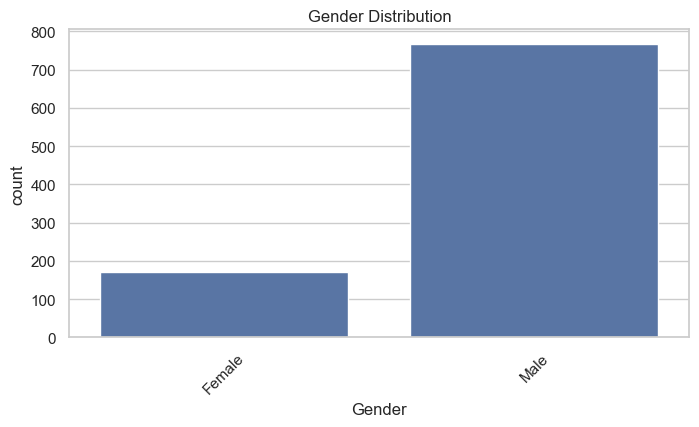

In [8]:
#Respondents Gender Distribution

# Create a new figure for the plot with a width of 8 inches and a height of 4 inches.
plt.figure(figsize=(8, 4))

# Create a count plot showing the number of occurrences for each gender category.
# - 'x="Gender"' specifies the column to group by.
# - 'data=df' tells Seaborn to use the 'df' DataFrame.
sns.countplot(x='Gender', data=df)

# Set the title of the plot.
plt.title('Gender Distribution')

# Rotate the x-axis labels by 45 degrees for better readability (useful if labels are long or overlap).
plt.xticks(rotation=45)

# Display the final plot.
plt.show()


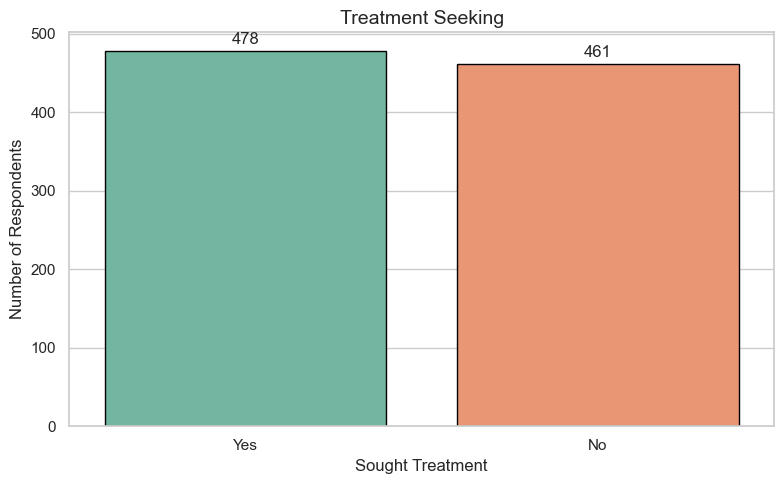

In [ ]:
plt.figure(figsize=(8, 5))

# Assign 'treatment' to both x and hue, and disable the legend
ax = sns.countplot(
    data=df,
    x='treatment',
    hue='treatment',        # Needed to use 'palette' properly
    palette='Set2',
    legend=False,
    edgecolor='black'
)

# Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=12)

# Title and axis labels
plt.title('Treatment Seeking', fontsize=14)
plt.xlabel('Sought Treatment', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Adjust font sizes for ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tight layout for spacing
plt.tight_layout()

# Show the final plot
plt.show()


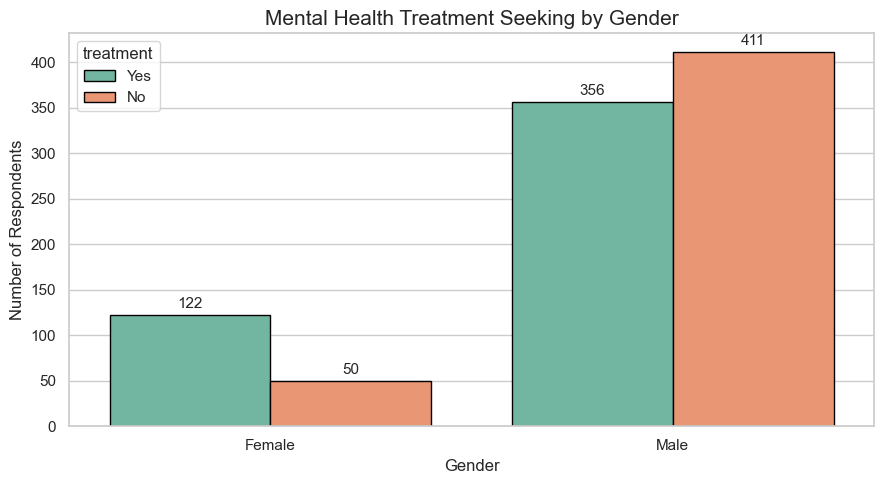

In [ ]:
# Clearer Grouped Bar Chart: Gender vs Treatment Seeking

plt.figure(figsize=(9, 5))  # Step 1: Define figure size

# Step 2: Draw a grouped bar chart
# - x='Gender': groups by gender
# - hue='treatment': separates bars for Yes/No in each gender
# - palette='Set2': improves contrast between bars
# - edgecolor='black': adds black border around bars for visibility
ax = sns.countplot(
    x='Gender',
    hue='treatment',
    data=df,
    palette='Set2',
    edgecolor='black'
)

# Step 3: Add data labels on each bar
# Loop through the bar containers and label each bar with its height (count)
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=11)

# Step 4: Add title and axis labels
plt.title('Mental Health Treatment Seeking by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Step 5: Adjust tick label size and angle
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Step 6: Improve layout and spacing
plt.tight_layout()

# Step 7: Show final plot
plt.show()


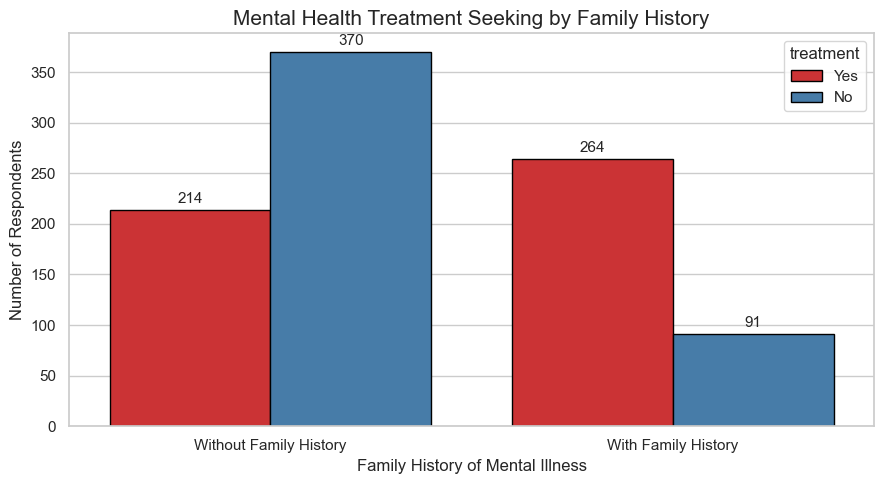

In [ ]:
#  Family History vs Treatment (Safe Tick Label Update)

# Step 1: Import a module to work with fixed tick positions and formatting
import matplotlib.ticker as ticker  # Although not used directly here, it's helpful when managing tick positioning

# Step 2: Create a new figure with specified dimensions (9 inches wide by 5 inches tall)
plt.figure(figsize=(9, 5))

# Step 3: Create a grouped bar chart using seaborn's countplot
# - x='family_history': groups bars by whether respondents reported family history of mental illness
# - hue='treatment': creates separate bars for those who sought treatment ('Yes') vs. those who didn’t ('No')
# - data=df: uses the dataset named df
# - palette='Set1': applies a visually distinct, high-contrast color scheme
# - edgecolor='black': adds black borders to each bar for visual clarity
ax = sns.countplot(
    x='family_history',
    hue='treatment',
    data=df,
    palette='Set1',
    edgecolor='black'
)

# Step 4: Add numerical count labels on top of each bar
# This loop iterates over each bar container (group of bars by hue)
for container in ax.containers:
    # Adds a label above each bar with its exact count value
    ax.bar_label(container, padding=3, fontsize=11)

# Step 5: Safely set custom tick positions on the x-axis
# - Seaborn maps 'No' to 0 and 'Yes' to 1 by default, so we explicitly set these positions
ax.set_xticks([0, 1])  # Fix the tick positions to match the bar locations

# Step 6: Set custom human-readable labels for the x-axis categories
# - Replaces 'No' with 'Without Family History' and 'Yes' with 'With Family History'
ax.set_xticklabels(['Without Family History', 'With Family History'])

# Step 7: Add a descriptive title to the plot
plt.title('Mental Health Treatment Seeking by Family History', fontsize=15)

# Step 8: Label the x-axis to describe what the categories represent
plt.xlabel('Family History of Mental Illness', fontsize=12)

# Step 9: Label the y-axis to describe what the bar heights represent
plt.ylabel('Number of Respondents', fontsize=12)

# Step 10: Adjust the font size of x-axis tick labels for better readability
plt.xticks(fontsize=11)

# Step 11: Adjust the font size of y-axis tick labels for better readability
plt.yticks(fontsize=11)

# Step 12: Automatically adjust layout to prevent label/title overlap or cutoff
plt.tight_layout()

# Step 13: Render and display the final plot on the screen
plt.show()


In [22]:
#  Filter data to only include respondents from the United States

# df['Country'] == 'United States':
#   This creates a Boolean mask (True/False) for rows where the value in the 'Country' column is exactly 'United States'.

# df[df['Country'] == 'United States']:
#   This applies the mask to the DataFrame, returning only rows where the condition is True.

# .copy():
#   Creates a new independent copy of the filtered DataFrame to avoid SettingWithCopyWarning in future operations.

# df_us:
#   This is the new DataFrame that contains only survey responses from people in the United States.
df_us = df[df['Country'] == 'United States'].copy()


In [ ]:
# Step 1: Import Libraries

# Import the pandas library and give it the alias 'pd'.
# Pandas is widely used for data manipulation and analysis, especially for working with tabular data using DataFrames.
import pandas as pd

# Import the pyplot module from the matplotlib library and give it the alias 'plt'.
# Pyplot provides a MATLAB-like interface for creating static, animated, and interactive plots.
import matplotlib.pyplot as plt

# Import the seaborn library and give it the alias 'sns'.
# Seaborn is built on top of matplotlib and provides a high-level interface for attractive and informative statistical graphics.
import seaborn as sns

# Set the default Seaborn theme for all plots to 'whitegrid'.
# This theme adds a white background with grid lines, making plots easier to read.
sns.set(style='whitegrid')


In [24]:
# 📂 Step 2: Load the Cleaned Dataset

# Load the CSV file located at the relative path '../data/final/survey_cleaned.csv'
# - pd.read_csv(...) reads the file into a pandas DataFrame.
# - '../data/final/survey_cleaned.csv' means:
#     go up one folder (..), then into 'data/final/', and open the 'survey_cleaned.csv' file.
df = pd.read_csv('../data/final/survey_cleaned.csv')

# Display the first 5 rows of the DataFrame.
# This helps preview the structure and sample contents of the dataset.
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,Il,No,No,Yes,Often,6-25,...,Yes,Somewhat Easy,No,No,Some Of Them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,In,No,No,No,Rarely,More Than 1000,...,Don'T Know,Don'T Know,Maybe,No,No,No,No,No,Don'T Know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,Not Applicable,No,No,No,Rarely,6-25,...,Don'T Know,Somewhat Difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Not Applicable,No,Yes,Yes,Often,26-100,...,No,Somewhat Difficult,Yes,Yes,Some Of Them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,Tx,No,No,No,Never,100-500,...,Don'T Know,Don'T Know,No,No,Some Of Them,Yes,Yes,Yes,Don'T Know,No


In [25]:

# df['Country'] == 'United States':
#   Creates a Boolean Series where each row is True if the 'Country' column value is 'United States' and False otherwise.

# df[df['Country'] == 'United States']:
#   Filters the DataFrame to keep only the rows where the condition is True (i.e., U.S. respondents).

# .copy():
#   Creates a new independent copy of the filtered DataFrame.
#   This avoids potential issues like SettingWithCopyWarning when modifying the new DataFrame later.

# df_us:
#   A new DataFrame variable that now contains only the survey responses from the United States.
df_us = df[df['Country'] == 'United States'].copy()


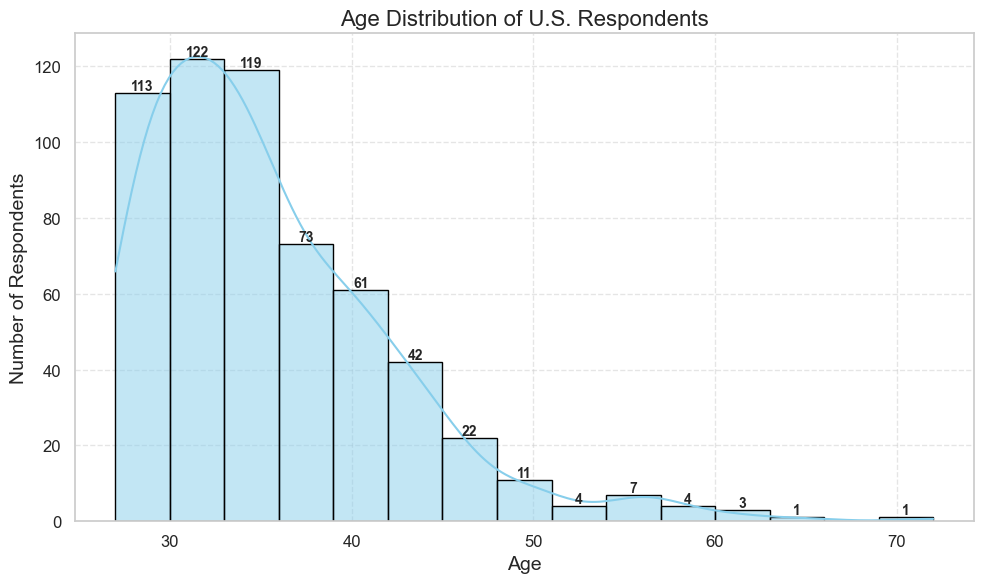

In [ ]:
#  Age Distribution Plot for U.S. Respondents

# Step 1: Create a new figure with a custom size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10, 6))  

# Step 2: Plot a histogram using Seaborn to show the age distribution
# - df_us['Age']: data to be plotted (Age column from U.S. respondents)
# - kde=True: overlays a smooth Kernel Density Estimate line
# - bins=15: divides the age range into 15 intervals (bins)
# - color='skyblue': sets the color of the bars
# - edgecolor='black': outlines each bar for better visibility
ax = sns.histplot(df_us['Age'], kde=True, bins=15, color='skyblue', edgecolor='black')

# Step 3: Add count labels on top of each bar in the histogram
# Loop through all the bars (patches) in the histogram
for patch in ax.patches:
    height = patch.get_height()  # Get the height (i.e., count) of the bar
    if height > 0:  # Only label bars that have a height (non-zero)
        ax.annotate(
            f'{int(height)}',  # Format the height as an integer
            (patch.get_x() + patch.get_width() / 2, height),  # Position label at the center-top of the bar
            ha='center',       # Horizontal alignment: center
            va='bottom',       # Vertical alignment: bottom (just above the bar)
            fontsize=10,
            fontweight='bold'
        )

# Step 4: Set the main title and axis labels
plt.title('Age Distribution of U.S. Respondents', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Step 5: Adjust font sizes of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Add a subtle dashed grid to the background
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Step 7: Automatically adjust padding around plot elements
plt.tight_layout()

# Step 8: Display the final plot
plt.show()


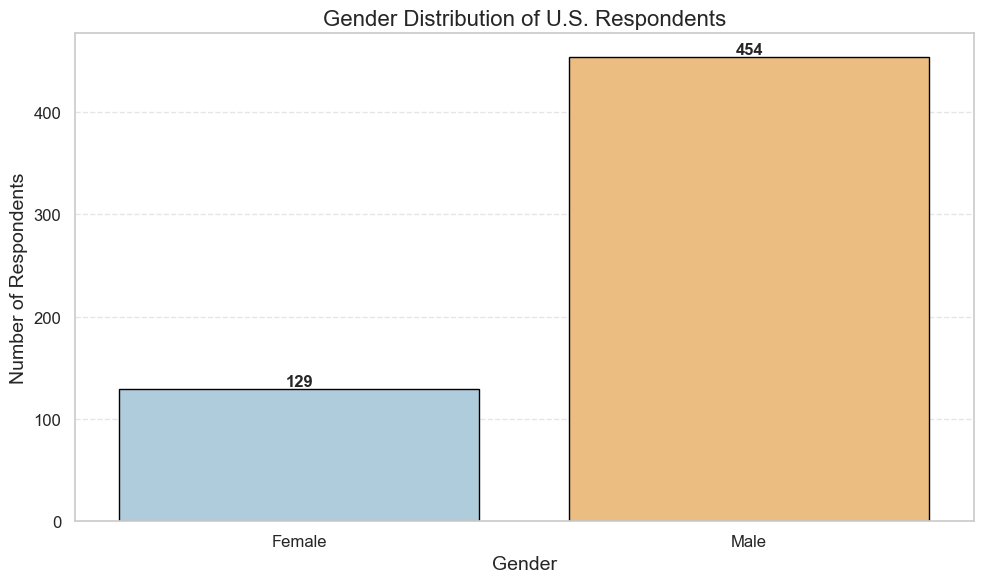

In [29]:
# 📊 Gender Distribution of U.S. Respondents (Future-Proofed for Seaborn 0.14+)

# Step 1: Create a new plot figure with width 10 inches and height 6 inches
plt.figure(figsize=(10, 6))

# Step 2: Create a count plot (bar chart) of the 'Gender' column
# - x='Gender': place gender categories on the x-axis
# - hue='Gender': required to assign the palette correctly (future-proof for Seaborn 0.14+)
# - data=df_us: use the filtered U.S. dataset
# - palette=[...]: assign soft blue and orange colors to the genders
# - edgecolor='black': add a black outline around each bar for better contrast
# - legend=False: disables the redundant legend since hue and x are the same
ax = sns.countplot(
    x='Gender',
    hue='Gender',                  # Fix: assign x variable to hue
    data=df_us,
    palette=['#a6cee3', '#fdbf6f'], 
    edgecolor='black',
    legend=False
)

# Step 3: Add exact count labels on top of each bar
# Loop through all the bar objects in the plot
for p in ax.patches:
    height = p.get_height()  # Get the height (value) of each bar
    ax.annotate(
        f'{int(height)}',  # Convert height to integer and format as a label
        (p.get_x() + p.get_width() / 2, height),  # Place label at the center-top of each bar
        ha='center',       # Horizontally center the label
        va='bottom',       # Place label slightly above the bar
        fontsize=12,       # Set font size
        fontweight='bold'  # Set font weight to bold
    )

# Step 4: Set the main title of the plot
plt.title('Gender Distribution of U.S. Respondents', fontsize=16)

# Step 5: Label the x-axis to indicate what the gender values represent
plt.xlabel('Gender', fontsize=14)

# Step 6: Label the y-axis to indicate the number of respondents
plt.ylabel('Number of Respondents', fontsize=14)

# Step 7: Format x-axis tick labels (e.g., 'Male', 'Female', etc.)
plt.xticks(fontsize=12)

# Step 8: Format y-axis tick labels (numerical values)
plt.yticks(fontsize=12)

# Step 9: Add a horizontal dashed gridline along the y-axis
# - This helps the viewer align bar heights more easily
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 10: Adjust spacing so elements don't overlap (title, labels, etc.)
plt.tight_layout()

# Step 11: Display the final plot on the screen
plt.show()


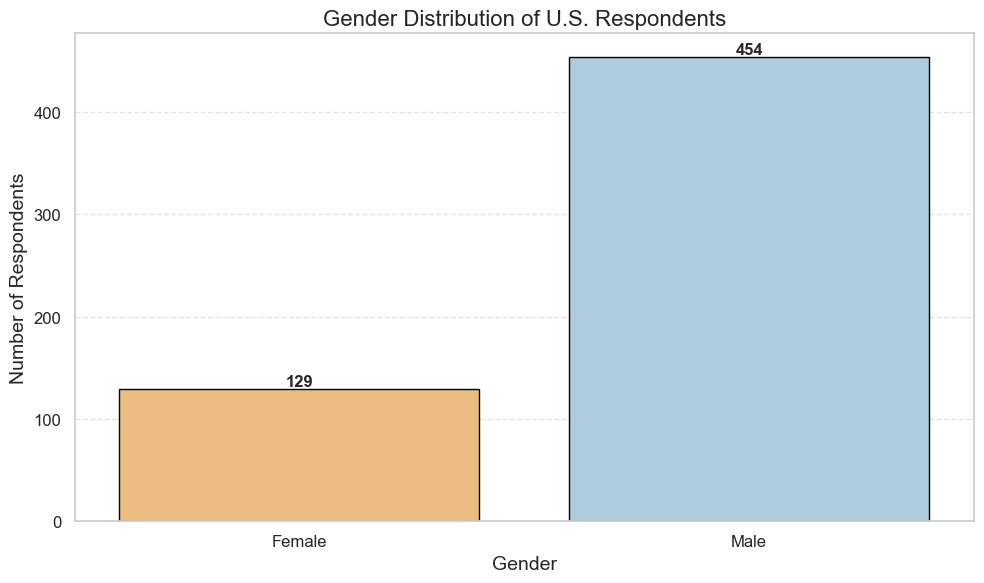

In [31]:
# 📊 Gender Distribution of U.S. Respondents (Seaborn 0.14+ Safe Code)

# Step 1: Create a new figure for the plot
# - figsize=(10, 6): sets the width of the figure to 10 inches and the height to 6 inches.
plt.figure(figsize=(10, 6))

# Step 2: Create a count plot (bar chart) using Seaborn
# - x='Gender': plots each gender category (Male, Female, Other) on the x-axis.
# - hue='Gender': required for applying custom colors via 'palette' without deprecation warnings.
# - data=df_us: uses the filtered DataFrame containing only U.S. respondents.
# - palette={...}: assigns specific colors to each gender category for consistency.
# - edgecolor='black': draws a black border around each bar for better visibility.
# - legend=False: hides the legend because the x-axis already explains the categories.
ax = sns.countplot(
    x='Gender',
    hue='Gender',
    data=df_us,
    palette={'Male': '#a6cee3', 'Female': '#fdbf6f', 'Other': '#b2df8a'},
    edgecolor='black',
    legend=False
)

# Step 3: Add numeric count labels on top of each bar.
# - ax.patches: retrieves all bar objects drawn by Seaborn.
for p in ax.patches:
    height = p.get_height()  # Get the height (count) of the bar.
    ax.annotate(
        f'{int(height)}',  # Convert the count to an integer and display as a label.
        (p.get_x() + p.get_width() / 2, height),  # Place the label at the horizontal center of the bar.
        ha='center',        # Horizontal alignment (centered above the bar).
        va='bottom',        # Vertical alignment (just above the bar).
        fontsize=12,        # Font size of the label.
        fontweight='bold'   # Makes the label text bold.
    )

# Step 4: Add a title to the plot.
# - fontsize=16: makes the title larger and easier to read.
plt.title('Gender Distribution of U.S. Respondents', fontsize=16)

# Step 5: Add a label for the x-axis.
# - Describes what the categories along the x-axis represent.
plt.xlabel('Gender', fontsize=14)

# Step 6: Add a label for the y-axis.
# - Describes what the bar heights represent (number of respondents).
plt.ylabel('Number of Respondents', fontsize=14)

# Step 7: Adjust the font size of the x-axis tick labels.
plt.xticks(fontsize=12)

# Step 8: Adjust the font size of the y-axis tick labels.
plt.yticks(fontsize=12)

# Step 9: Add gridlines along the y-axis.
# - axis='y': adds gridlines only for horizontal lines.
# - linestyle='--': makes them dashed for a lighter appearance.
# - alpha=0.5: sets transparency to 50% for a subtle effect.
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 10: Automatically adjust layout to ensure no elements are cut off.
plt.tight_layout()

# Step 11: Display the final plot on the screen.
plt.show()


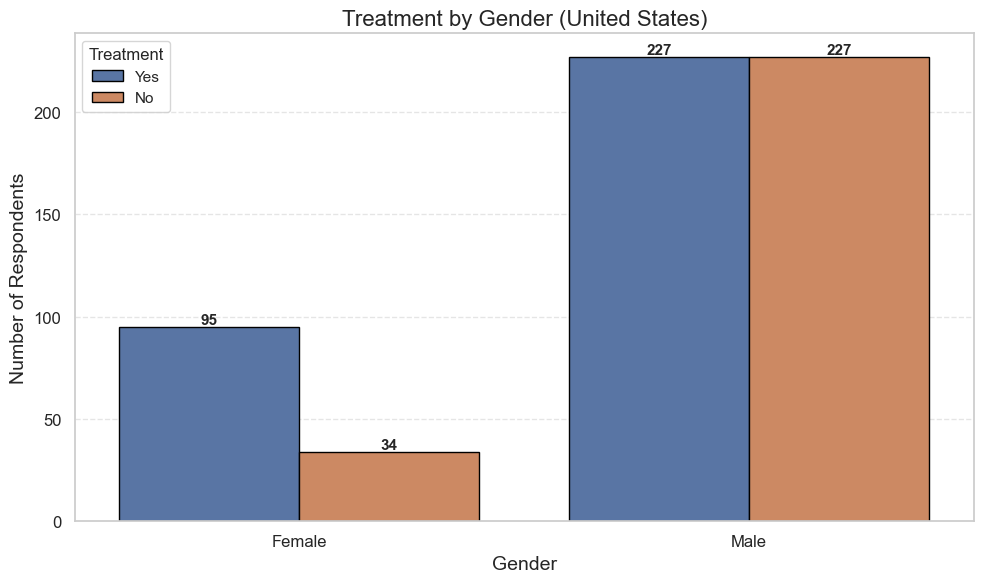

In [34]:
# rouped Bar Chart: Treatment by Gender (United States)

# Step 1: Create a new figure for the plot
# - figsize=(10, 6): sets the width to 10 inches and the height to 6 inches
plt.figure(figsize=(10, 6))

# Step 2: Create a grouped bar chart (countplot) using Seaborn
# - x='Gender': groups bars along the x-axis by gender category
# - hue='treatment': splits each gender group into two bars (Yes vs No for treatment)
# - data=df_us: uses only the U.S. respondent subset
# - palette=[...]: custom colors for 'No' and 'Yes' treatment bars
# - edgecolor='black': adds a black border around each bar for better contrast
ax = sns.countplot(
    x='Gender',
    hue='treatment',
    data=df_us,
    palette=['#4c72b0', '#dd8452'],
    edgecolor='black'
)

# Step 3: Add count labels on top of each bar
# - ax.patches stores all bar objects in the chart
for bar in ax.patches:
    height = bar.get_height()  # Get the height of each bar (number of respondents)
    if height > 0:  # Only label visible bars (non-zero height)
        ax.annotate(
            f'{int(height)}',  # Convert count to integer and display as label
            (bar.get_x() + bar.get_width() / 2, height),  # Position label above center of each bar
            ha='center',       # Horizontally center the label
            va='bottom',       # Slightly above the bar top
            fontsize=11,
            fontweight='bold'
        )

# Step 4: Add title and axis labels
plt.title('Treatment by Gender (United States)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Step 5: Customize tick label font sizes for x and y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Format and label the legend
# - title='Treatment': shows what the hue colors represent
# - title_fontsize=12: font size for the legend title
# - fontsize=11: font size for the legend labels ('Yes', 'No')
plt.legend(title='Treatment', title_fontsize=12, fontsize=11)

# Step 7: Add horizontal dashed grid lines along y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 8: Automatically adjust plot layout to avoid clipping of elements
plt.tight_layout()

# Step 9: Display the final plot
plt.show()


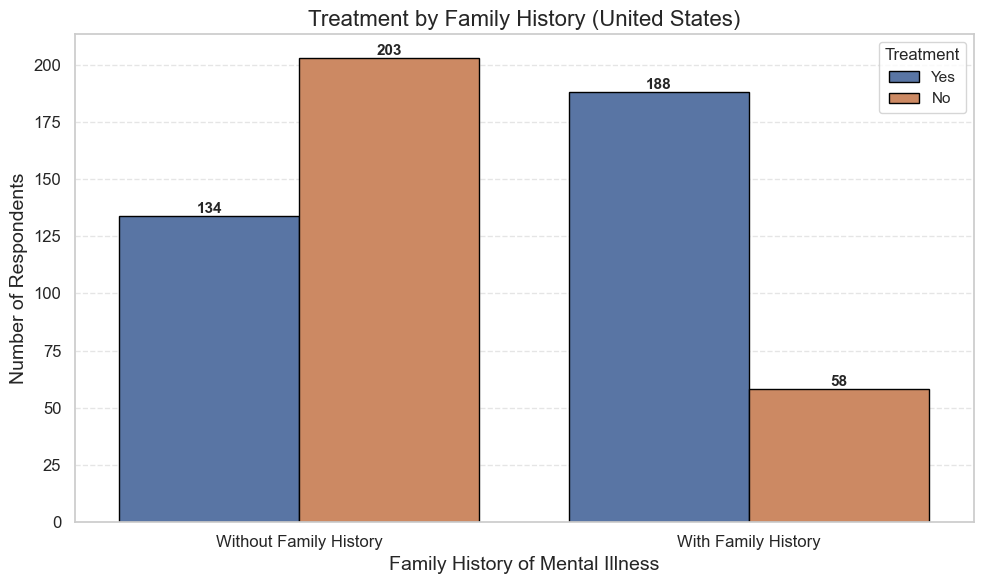

In [36]:
# Step 1: Create a new figure for the plot
# - figsize=(10, 6): defines the size of the chart in inches
plt.figure(figsize=(10, 6))

# Step 2: Create a grouped bar chart using Seaborn
# - x='family_history': groups bars based on whether the respondent has a family history of mental illness
# - hue='treatment': splits each group into two bars (Yes and No) based on treatment-seeking behavior
# - data=df_us: uses the DataFrame containing U.S.-only respondents
# - palette=[...]: defines specific colors for each treatment category
# - edgecolor='black': adds black borders around bars to improve contrast and readability
ax = sns.countplot(
    x='family_history',
    hue='treatment',
    data=df_us,
    palette=['#4c72b0', '#dd8452'],
    edgecolor='black'
)

# Step 3: Loop through each bar in the plot to add a label on top
for bar in ax.patches:
    height = bar.get_height()  # Get the height (count) of each bar
    if height > 0:  # Only add labels for bars that are visible (non-zero height)
        ax.annotate(
            f'{int(height)}',  # Convert the count to an integer and format it as a label
            (bar.get_x() + bar.get_width() / 2, height),  # Position label at the center-top of the bar
            ha='center',  # Horizontal alignment: center
            va='bottom',  # Vertical alignment: just above the bar
            fontsize=11,  # Font size of the label
            fontweight='bold'  # Bold font for emphasis
        )

# Step 4: Manually set the x-axis tick positions
# - [0, 1]: the positions of the "No" and "Yes" categories in the original data
ax.set_xticks([0, 1])

# Step 5: Replace default x-axis labels with more descriptive text
# - 'No' → 'Without Family History'
# - 'Yes' → 'With Family History'
ax.set_xticklabels(['Without Family History', 'With Family History'])

# Step 6: Set the chart title with font size
plt.title('Treatment by Family History (United States)', fontsize=16)

# Step 7: Label the x-axis with a descriptive title
plt.xlabel('Family History of Mental Illness', fontsize=14)

# Step 8: Label the y-axis to indicate what the bar height represents
plt.ylabel('Number of Respondents', fontsize=14)

# Step 9: Customize the font size for x-axis tick labels
plt.xticks(fontsize=12)

# Step 10: Customize the font size for y-axis tick labels
plt.yticks(fontsize=12)

# Step 11: Customize and format the legend
# - title='Treatment': describes what the bar colors represent
# - title_fontsize=12: font size for the legend title
# - fontsize=11: font size for the labels inside the legend (Yes/No)
plt.legend(title='Treatment', title_fontsize=12, fontsize=11)

# Step 12: Add horizontal dashed grid lines on the y-axis
# - axis='y': applies the grid only to the y-axis
# - linestyle='--': uses dashed lines for a light, non-intrusive look
# - alpha=0.5: sets transparency to make the grid subtle
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 13: Automatically adjust spacing between plot elements
# - Prevents clipping or overlapping of titles, labels, or ticks
plt.tight_layout()

# Step 14: Render the final plot on screen
plt.show()


Interpretation of the Correlation Heatmap (United States)

Diagonal values (always 1):

These represent perfect correlation of each variable with itself.

No need to interpret these; they serve as a reference.

Age & Treatment (0.03):

 Very weak positive correlation. Age does not significantly influence treatment-seeking.

Age & Family History (0.001):

 No meaningful relationship between age and having a family history of mental illness.

Treatment & Family History (0.36):

 Moderate positive correlation.

 Individuals with a family history are more likely to seek mental health treatment.



In [31]:
# 📋 Cross-tab: Gender vs Treatment (percent breakdown)
print("🔢 Percentage of treatment seekers by gender (U.S.):")
print(pd.crosstab(df_us['Gender'], df_us['treatment'], normalize='index') * 100)


🔢 Percentage of treatment seekers by gender (U.S.):
treatment         No        Yes
Gender                         
Female     26.356589  73.643411
Male       50.000000  50.000000


Females are much more likely to seek treatment (about 74%) than not.

Males are evenly split — 50% have sought treatment, 50% have not.

This suggests that gender influences treatment-seeking behavior, with women more likely to take action.

Summary Insights (United States Focus)
Key Observations:

The majority of respondents fall within the 27 to 35 age range.

Individuals with a family history of mental illness are significantly more likely to seek treatment.

Females show a noticeably higher rate of treatment-seeking compared to males.

The correlation between age and treatment is very weak, confirming what the boxplot also suggests.

These findings will directly inform the feature selection for our predictive Streamlit application.

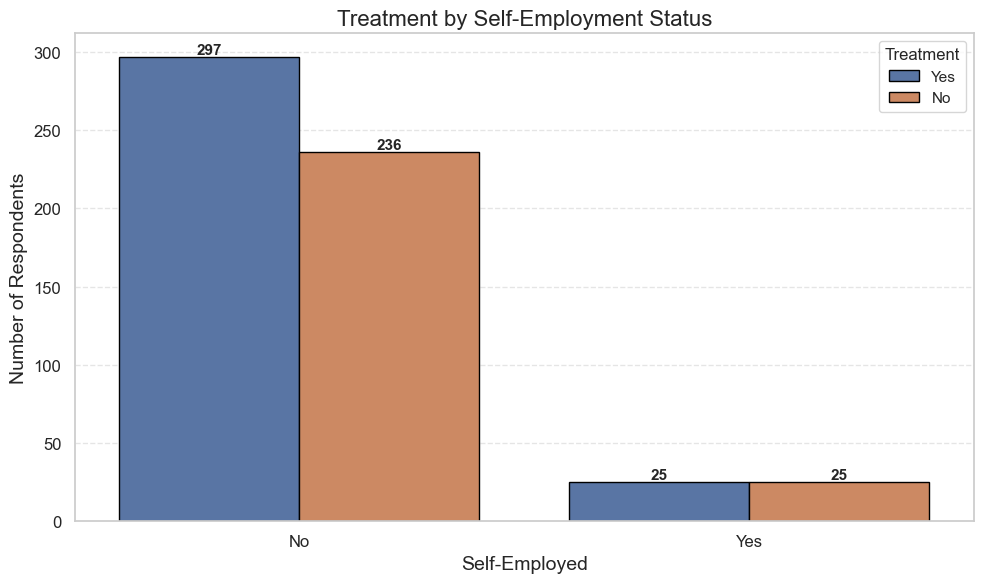

In [38]:
# 📊 Treatment by Self-Employment Status

# Step 1: Create a new figure with defined width and height
plt.figure(figsize=(10, 6))

# Step 2: Plot a grouped bar chart using Seaborn
# - x='self_employed': groups bars by self-employment status ('Yes', 'No', maybe 'Prefer not to say')
# - hue='treatment': creates separate bars for 'Yes' and 'No' treatment responses
# - data=df: uses your current DataFrame in VS Code (replace if needed)
# - palette: applies distinct colors for visual contrast
# - edgecolor='black': outlines each bar to make them more visible
ax = sns.countplot(
    x='self_employed',
    hue='treatment',
    data=df_us,
    palette=['#4c72b0', '#dd8452'],
    edgecolor='black'
)

# Step 3: Add exact count labels above each bar
for bar in ax.patches:
    height = bar.get_height()  # Get bar height (respondent count)
    if height > 0:  # Skip bars with 0 height
        ax.annotate(
            f'{int(height)}',  # Convert count to integer string
            (bar.get_x() + bar.get_width() / 2, height),  # Position label at center-top of bar
            ha='center', va='bottom', fontsize=11, fontweight='bold'
        )

# Step 4: Add title and axis labels
plt.title('Treatment by Self-Employment Status', fontsize=16)
plt.xlabel('Self-Employed', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Step 5: Customize tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Format the legend
plt.legend(title='Treatment', title_fontsize=12, fontsize=11)

# Step 7: Add horizontal grid lines to aid readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 8: Adjust layout to avoid overlap
plt.tight_layout()

# Step 9: Display the final chart
plt.show()
